## Задача 2 “Преобразование Фурье” ##

* Установите Jupyter и Python.
* Для функции f на диапазоне [0, 10] с частотой дискретизации 100 изготовьте код для построения графика f. Используйте **matplotlib**.
* Реализуйте прямое и обратное дискретное преобразование Фурье FFT и FFTReverse на Python за O(n log n).
* По функции f вычислите g = FFT( f ).
* Вычислите f2 = FFTReverse( g ).
* Постройте график f2.
* Обнулите некоторую долю D последних коэффициентов g. Обновите f2 и ее график. Попробуйте несколько различных значений D.
* Проведите эксперименты с функциями f = x, x^2, sin x, sin x^2, sin x / x. Для каждой функции найдите долю D, для которой разница f и f2 видна невооруженным глазом.

In [0]:
import functools
import math
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
def get_omega(scale, denominator):
    phi = 2 * math.pi * scale / denominator
    return complex(math.cos(phi), math.sin(phi))

In [0]:
def prepare_data(addition, *args):
    for arr in args:
        arr.extend([0] * (addition - len(arr)))

def zero_extend(function):
    @functools.wraps(function)
    def wrapper(*args, **kwargs):
        for i, arg in enumerate(args):
            if type(arg) == list:
                addition = 1
                while addition < len(arg):
                    addition *= 2
                prepare_data(addition, args[i])  
        return function(*args, **kwargs)
    return wrapper

In [0]:
@zero_extend
def FFT(raw_data, inverted=False):
    size = len(raw_data)
    scale = -1 if inverted else 1
    denominator = 2 if inverted else 1
    omega = get_omega(scale, size)
    if size > 1:
        even = FFT(raw_data[::2], inverted)
        odd = FFT(raw_data[1::2], inverted)
        lhs = [
            (even[i] + omega**i * odd[i]) / denominator 
            for i in range(size // 2)
        ]
        rhs = [
            (even[i] - omega**i * odd[i]) / denominator 
            for i in range(size // 2)
        ]
        raw_data = lhs + rhs
    return raw_data[:]

In [0]:
def FFTReverse(raw_data):
    return FFT(raw_data, inverted=True) 

In [0]:
def make_plot(function, title=""):
    
    def discretize(function): 
        return [i/10.0  for i in range(100)],\
          [function(i/10.0) for i in range(100)]

    marker_size = 6
    x, y = discretize(function)
    g = FFT(y)
    plt.figure(figsize=(14, 14))
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title(title)
    
    def make_scatter(ifft_values):
        return plt.scatter(x, ifft_values[:len(x)], s=marker_size)
    
    series = (
        make_scatter(y),
        make_scatter(FFTReverse(g)),
        make_scatter(FFTReverse(g[:125])),
        make_scatter(FFTReverse(g[:124])),
        make_scatter(FFTReverse(g[:123]))
    )
    plt.figlegend(series, ("f(x)", "100%", "98.4%", "96.9%", "96.1%"), 7)
    plt.show()

### Построим графики для функций ###

In [0]:
functions = {
    "f(x) = x": lambda x: x,
    "f(x) = x^2": lambda x: x**2,
    "f(x) = sin x": lambda x: math.sin(x),
    "f(x) = sin x^2": lambda x: math.sin(x**2),
    "f(x) = sin x / x": lambda x: math.sin(x) / (x + 10**-9),
}

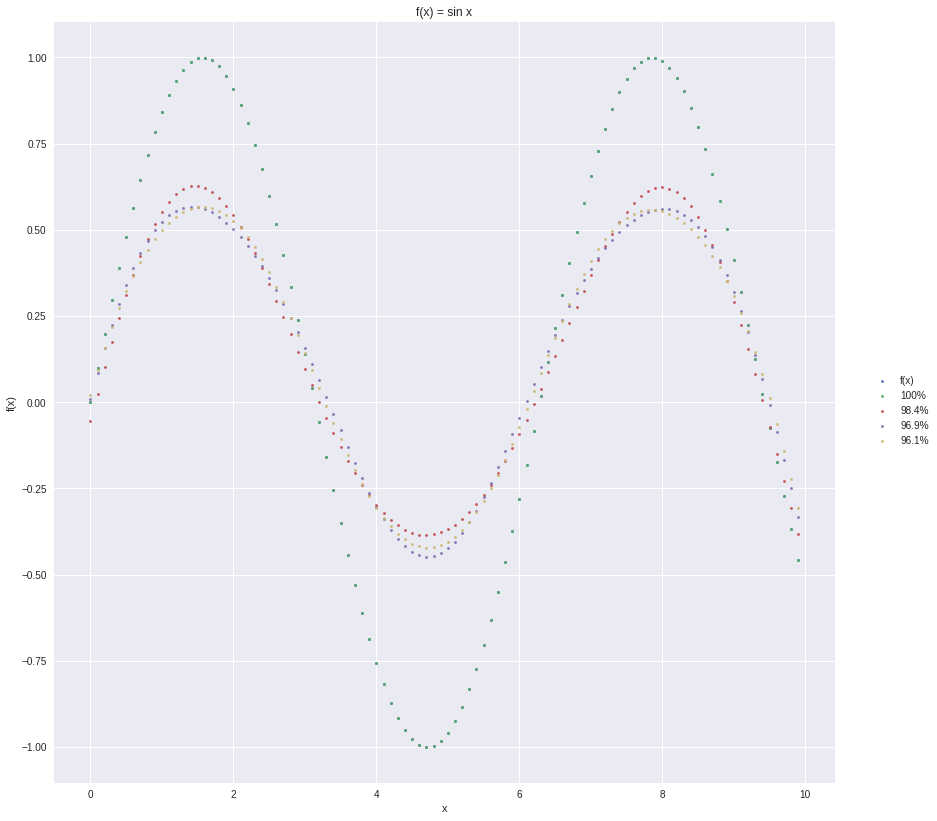

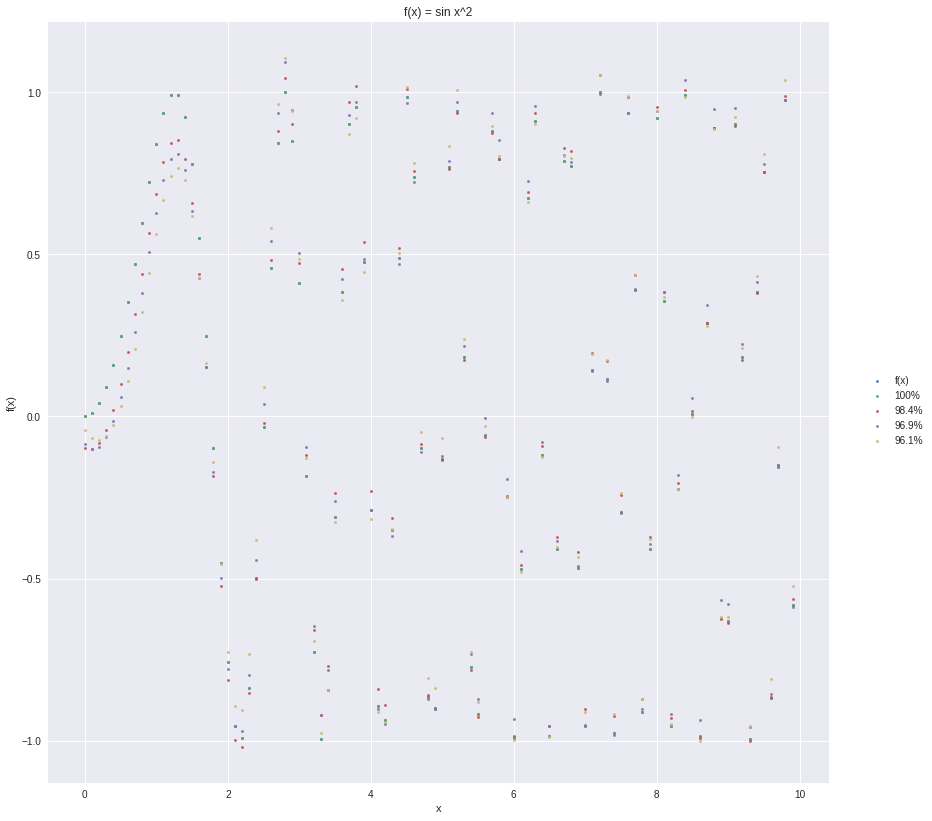

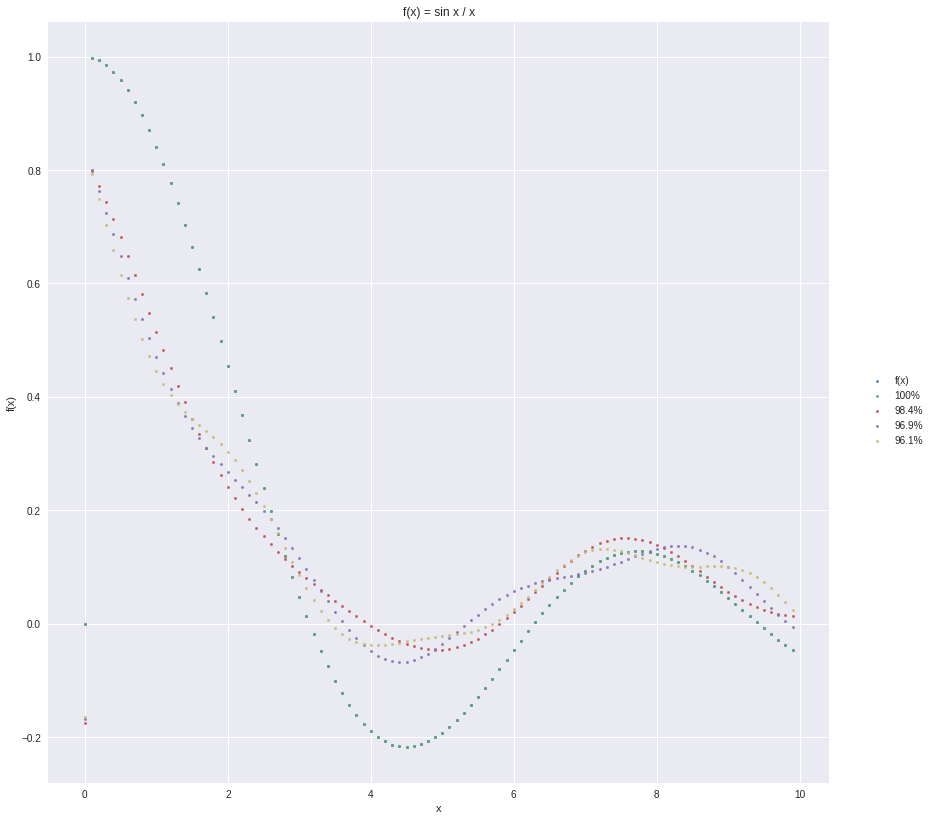

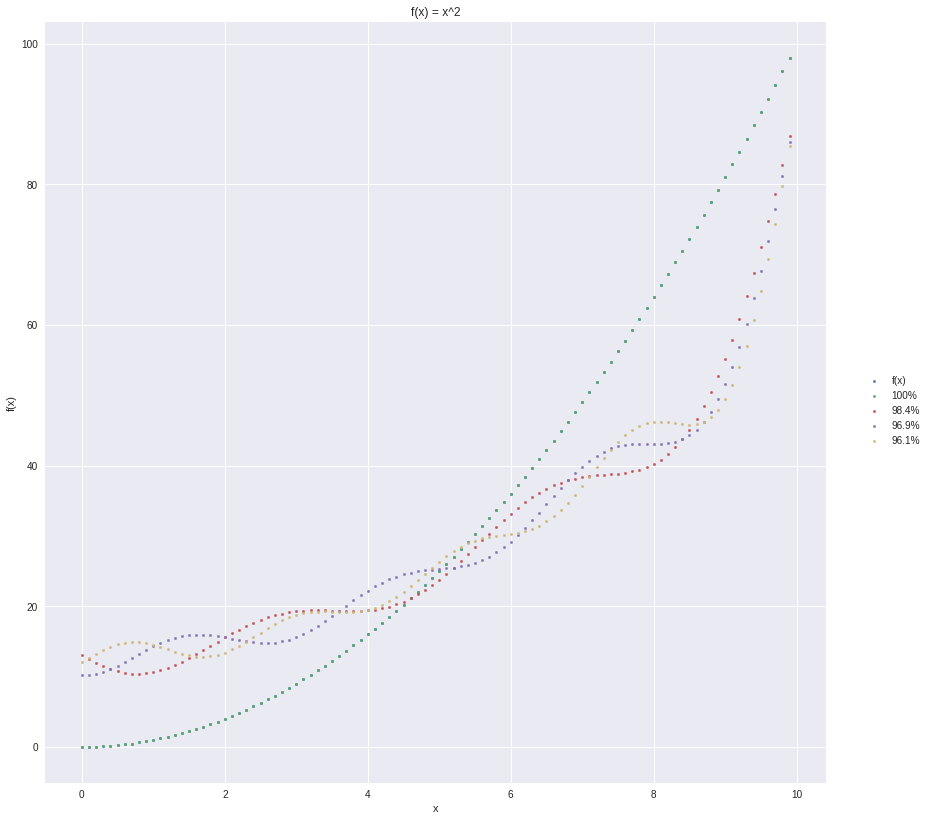

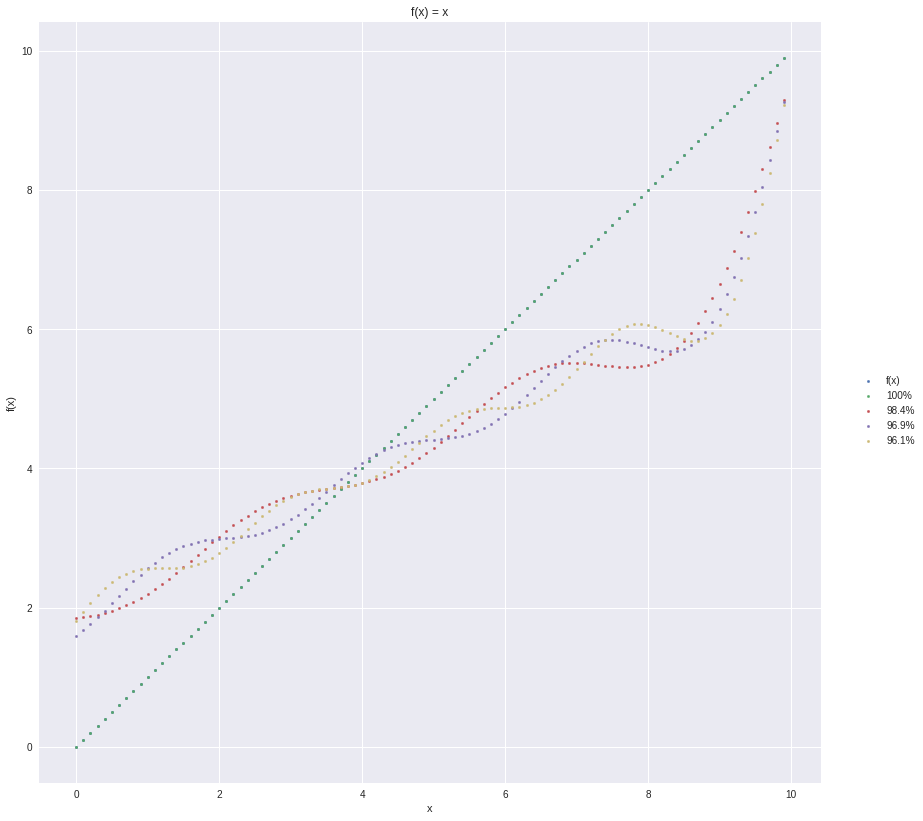

In [0]:
for (title, function) in functions.items():
    make_plot(function, title)

### Реализация умножение длинной арифметики (просто 2 массива/cтроки) через FFT ###

In [0]:
def arraying(function):
    @functools.wraps(function)
    def wrapper(*args, **kwargs):
        new_args = []
        for arg in args:
            if type(arg) == str:
                digit_array = list(map(int, [digit for digit in arg]))
                new_args.append(digit_array)
            else:
                new_args.append(arg)
            new_args[-1].reverse()
        return function(*new_args, **kwargs)
    return wrapper

In [0]:
@arraying
@zero_extend
def big_int_multiply(lhs, rhs):
    filled_length = 1
    while filled_length < max(len(lhs), len(rhs)):
        filled_length *= 2 
    filled_length *= 2 
    prepare_data(filled_length, lhs, rhs)
    multiplicated = [
        ilhs_elem * irhs_elem 
        for ilhs_elem, irhs_elem in zip(FFT(lhs), FFT(rhs))
    ]
    multiplicated = list(map(lambda x: int(x.real + 0.5), 
                             FFTReverse(multiplicated)))
    prepare_data(filled_length, multiplicated)    
    carry = 0
    for i in range(filled_length):
        multiplicated[i] += carry
        carry = multiplicated[i] / 10
        multiplicated[i] %= 10
    while len(multiplicated) > 1 and multiplicated[-1] == 0:
        del multiplicated[-1]
    multiplicated.reverse()
    return "".join(list(map(str, multiplicated)))

### Пробуйте сами: ###

In [0]:
lhs, rhs = str(input()), str(input())
print(big_int_multiply(lhs, rhs))

7777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777